# Exploring and Preparing Data for Analysis

In this notebook, we’ll guide you through the fundamental steps of working with a dataset.

By the end of this notebook, you will be able to perform basic exploratory data analysis (EDA) to uncover patterns and insights.

The dataset we’ll be working with represents sales data from an online retail store.

## Load the Dataset

In [2]:
import pandas as pd
data = pd.read_csv('../data/sales_data.csv')  # Example dataset

## Preview the Data with .head()
Let’s preview the first few rows with `.head()`. 

In Pandas it defaults to displaying the first 5 rows of the dataset.

However, you can specify a different number of rows by passing an integer as an argument to `.head()`.

For example: `data.head(10)` will display the first 10 rows.


In [3]:
# preview the data
print(data.head())

   Sales Region Product        Date    Cost
0    250  North       A  2024-01-01  216.31
1    400   East       B  2024-01-02  348.15
2    150   West       C  2024-01-03  123.00
3    350  South       D  2024-01-04  296.90
4    500  North       A  2024-01-05  378.85


## Inspect the Structure with .info()
We inspect the structure of the dataset with `.info()`.

There are no missing values in any columns (Non-Null Count matches total rows).
`Sales` is an integer type (`int64`), `Cost` is a float type (`float64`), while `Region`, `Product`, and `Date` are object types.

Pandas treats any non-numeric data as an object by default.


In [4]:
# inspect the structure with info()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sales    10 non-null     int64  
 1   Region   10 non-null     object 
 2   Product  10 non-null     object 
 3   Date     10 non-null     object 
 4   Cost     10 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes
None


If you know the Region column is meant to be text, you can explicitly convert it to a string data type using:

In [5]:
# convert Region to string
data['Region'] = data['Region'].astype('string')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sales    10 non-null     int64  
 1   Region   10 non-null     string 
 2   Product  10 non-null     object 
 3   Date     10 non-null     object 
 4   Cost     10 non-null     float64
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 532.0+ bytes
None


## Generate Statistics with .describe()

These statistics help us identify outliers and understand data ranges.

The `count` value represents the number of non-missing (non-NaN) entries in each column.
- `Count` for `Sales` is 10, because there are no non-missing values.
- The `maximum sales` value (600) is significantly higher than the minimum value (50), suggesting possible outliers.
- The `mean` (325) is close to the `median` (50th percentile = 325), indicating a relatively balanced distribution for this small dataset.

Remember, an unbalanced distribution skews results: the `mean` may not reflect typical values, `outliers` can distort analysis, and machine learning models might struggle. 

Further analysis might confirm whether the high (600) or low (50) values are genuine or anomalies.


In [ ]:
# generate statistics
#data.describe(include='all')
#data['Sales'].describe()
data.describe()



,Sales,Cost
count,10.000000,10.000000
mean,325.000000,256.776000
std,168.737139,122.868683
min,50.000000,38.460000
25%,212.500000,183.415000
50%,325.000000,257.920000
75%,437.500000,359.392500
max,600.000000,411.560000


## Extracting the Month from a Date Column
Let’s start by extracting the month from the `Date` column. 

This helps us identify trends based on the time of year. 

For example, do certain months see higher sales?


In [18]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract the month
#data['Month'] = data['Date'].dt.month_name()
data['Month'] = data['Date'].dt.strftime('%m')

print(data[['Date', 'Month']])

        Date Month
0 2024-01-01    01
1 2024-01-02    01
2 2024-01-03    01
3 2024-01-04    01
4 2024-01-05    01
5 2024-01-06    01
6 2024-01-07    01
7 2024-01-08    01
8 2024-01-09    01
9 2024-01-10    01


## Normalising Sales Data
Next, let’s normalise the `Sales` data using Min-Max scaling. 

Normalisation is useful when we want to compare columns with different ranges or prepare data for machine-learning models.

This transforms Sales to a range between 0 and 1, where:
- 0 represents the minimum sales value.
- 1 represents the maximum sales value.
- All other sales values are scaled proportionally between 0 and 1.

It makes data easier to compare or use in machine learning models, especially when ranges are vastly different.


In [19]:
# Normalise the Sales column
data['Normalised_Sales'] = (data['Sales'] - data['Sales'].min()) / (data['Sales'].max() - data['Sales'].min())
print(data[['Sales', 'Normalised_Sales']])


   Sales  Normalised_Sales
0    250          0.363636
1    400          0.636364
2    150          0.181818
3    350          0.545455
4    500          0.818182
5    300          0.454545
6    200          0.272727
7    450          0.727273
8    600          1.000000
9     50          0.000000


## Calculate Profit
Let’s calculate Profit for each transaction using the formula:

Profit = Sales − Cost

In [20]:
# Calculate Profit
data['Profit'] = data['Sales'] - data['Cost']
print(data[['Sales', 'Cost', 'Profit']])


   Sales    Cost  Profit
0    250  216.31   33.69
1    400  348.15   51.85
2    150  123.00   27.00
3    350  296.90   53.10
4    500  378.85  121.15
5    300  218.94   81.06
6    200  172.45   27.55
7    450  363.14   86.86
8    600  411.56  188.44
9     50   38.46   11.54


## Categorize Sales into Tiers
Now, let’s categorise sales into 'High' and 'Low' tiers. 

We’ll use a threshold of 300 for this activity:
- Sales > 300 → High
- Sales ≤ 300 → Low

In [21]:
# Categorize Sales into Tiers
data['Sales_Tier'] = ['High' if sale > 300 else 'Low' for sale in data['Sales']]
print(data[['Sales', 'Cost', 'Region', 'Sales_Tier']])
print (data)

   Sales    Cost Region Sales_Tier
0    250  216.31  North        Low
1    400  348.15   East       High
2    150  123.00   West        Low
3    350  296.90  South       High
4    500  378.85  North       High
5    300  218.94   East        Low
6    200  172.45   West        Low
7    450  363.14  South       High
8    600  411.56  North       High
9     50   38.46   East        Low
   Sales Region Product       Date    Cost Month  Normalised_Sales  Profit  \
0    250  North       A 2024-01-01  216.31    01          0.363636   33.69   
1    400   East       B 2024-01-02  348.15    01          0.636364   51.85   
2    150   West       C 2024-01-03  123.00    01          0.181818   27.00   
3    350  South       D 2024-01-04  296.90    01          0.545455   53.10   
4    500  North       A 2024-01-05  378.85    01          0.818182  121.15   
5    300   East       B 2024-01-06  218.94    01          0.454545   81.06   
6    200   West       C 2024-01-07  172.45    01          0.272727   

## Histogram for Distribution Analysis
A histogram shows how Sales values are distributed. 

It helps answer questions like:

- Are most sales concentrated in a specific range?
- Are there many low-value or high-value sales?
- Are there outliers?

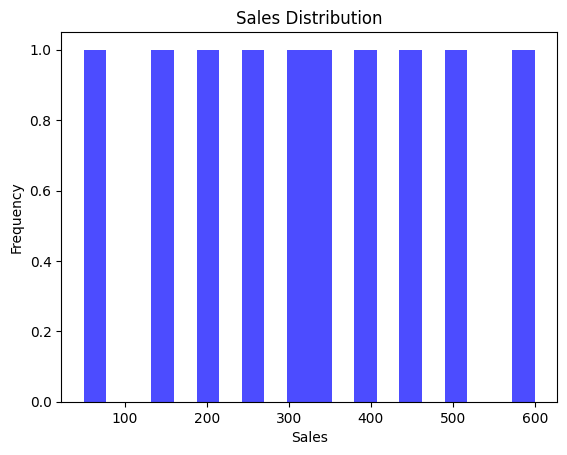

In [31]:
import matplotlib.pyplot as plt

# Plotting a histogram
plt.hist(data['Sales'], bins=20, color='blue', alpha=0.7)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### Bins
In the context of a histogram, bin refers to the intervals into which data is grouped to create the histogram. The number of bins determines how the range of data is divided.

If your dataset ranges from 0 to 600 and you set bins=20, the data is divided into 20 equal intervals of size 30.

Bin Width = 600/20 = 30

The bins will be:
- `Bin 1:` 0–30
- `Bin 2:` 30–60
- `Bin 3`: 60–90
- ... and so on, up to `Bin 20:` 570–600.

**Why Does the Number of Bins Matter?**
- `Too Few Bins:` Oversimplifies data, hiding patterns.
- `Too Many Bins:` Overcomplicates the histogram, making it hard to interpret.
- `Balanced Bins:` Provides enough detail to reveal patterns without overwhelming.


## Scatter Plot for Relationships
A scatter plot visualizes the relationship between two variables. In this case, Sales and Cost. 

It helps answer:

- Does higher Sales always lead to higher Costs?
- Are there transactions where Sales are high but Costs are low (indicating high efficiency)?
- Are there outliers?

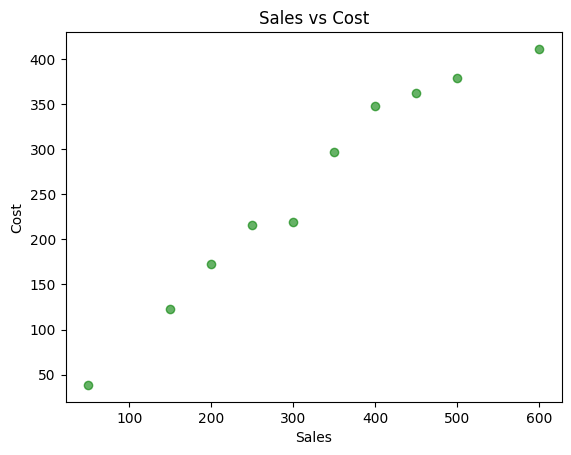

In [23]:
# Scatter plot comparing Sales and Cost
plt.scatter(data['Sales'], data['Cost'], alpha=0.6, color='green')
plt.title('Sales vs Cost')
plt.xlabel('Sales')
plt.ylabel('Cost')
plt.show()

## Pairplot for Variable Correlations (using Seaborn)
A pairplot is a grid of scatter plots that shows relationships between multiple numerical variables (e.g., Sales, Cost). 

It helps:
- Identify correlated variables.
- Highlight unusual patterns or clusters.

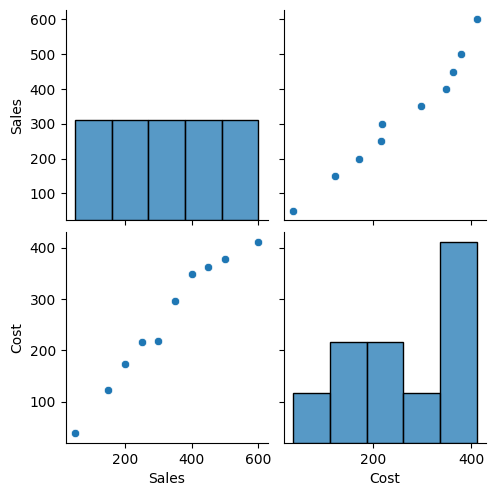

In [24]:
import seaborn as sns

# Creating a pairplot for numerical columns
sns.pairplot(data[['Sales', 'Cost']])
plt.show()

**What You See:**
- **Diagonal (Histograms):** These show the distribution of individual variables:
    - `Sales:` The histogram reveals the range and frequency of sales values.
    - `Cost:` The histogram shows the distribution of costs.
- **Off-Diagonal (Scatter Plots):** These show how Sales and Cost relate:
    - If the points align closely in an upward or downward trend, it indicates a correlation.
    - Patterns or clusters may suggest groups in your data or unusual behaviour.
